## Import Stage
Importing the Pandas Library, NumPy Library, MatPlot Library, and Seaborn Library. These allow for the implementaton of a cornucopia of functions that can allow for proper preprocessing and graphical representation. 

In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data'
Titles = ['L-Core','L-SURF','L-02','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT','decision ADM-DECS']
Data = pd.read_csv(URL,names=Titles)













## Pre-Processing 
This stage of code is built to pre-process the data. This includes ridding the data of incomplete sets, fixing string issues, and ensuring that every letter is implemented correctly. 
Preprocessing fixes:
1. Ridded the data of sets that lacked all data and instead replaced missing data with a "?". This reduced the data from 90 constituents to 87.
2. The comfort answers (0-20) are reported as numbers, but due to the data's storage, they are imported as strings. To fix this, I used the pandas command "to_numeric" to properly convert the strings to their specificed numeric values.
3. The letter A was followed by a space upon importing the data ("A ") which resulted in an obscure data point. This was fixed by using the same replace command in step one (replace).

Figure: Pre Processed Data

In [91]:
PP_Data = Data.replace({'?':np.nan}).dropna()

PP_Data = PP_Data.replace({'A ':'A'})

PP_Data["COMFORT"] = pd.to_numeric(PP_Data["COMFORT"])
#PP_Data.shape

PP_Data






,L-Core,L-SURF,L-02,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
5,high,low,good,mid,stable,stable,unstable,15,S
6,mid,low,excellent,high,stable,stable,mod-stable,5,S
7,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,mid,high,good,mid,stable,stable,stable,10,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


## L-CORE v COMFORT
L-core is defined as a patient's internal temperature (C). According to the results presented in the figure display below, Comfort levels were grossly highest in the mid temperature range. This makes sense as the mid temperature range can be thought of as the homeostatic comfort range for the body. 

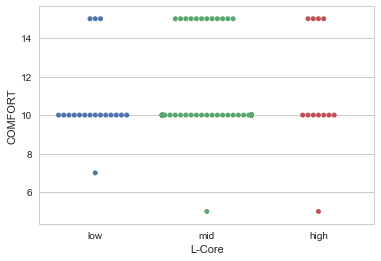

In [92]:
sns.swarmplot(x="L-Core", y="COMFORT", data=PP_Data, order=["low","mid","high"])

## L-SURF v COMFORT
L-Surf is defined as a patient's surface temperature (C). The majority of results are found to be at comfort level 10/20 across the board. This result could be due to the post-operative subjectivity/indifference of response, but a significant majority selected high comfort within the mid-range of surface temperature. 

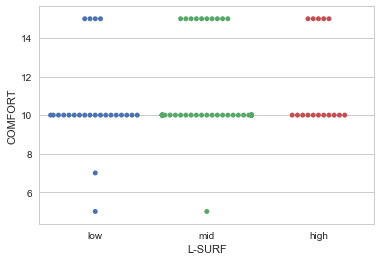

In [93]:
sns.swarmplot(x="L-SURF", y="COMFORT", data=PP_Data, order=["low","mid","high"])


## L-02 v COMFORT
L-02 is defined as % oxygen saturation. Typically, an oximeter reading betwene 95 and 100 is in perfect health. Only good and excellent ranges were measured from the dataset (i.e no patients measured in the fair or poor ranges). This implies stability in oxygen saturation levels post-operation. This is the expected norm, however, most high comfort respones were found within the good range, mid range responses were relatively equal, while uncomfortable responses were 2 to 1 in an excellent to good ratio. 

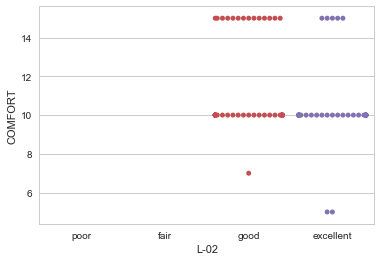

In [94]:
sns.swarmplot(x="L-02", y="COMFORT", data=PP_Data, order=["poor","fair","good","excellent"])


## L-BP  v. COMFORT
L-BP is defined as the last measurement of blood pressure taken on the patient. Very few pressures were found in the low range. Instead, the majority were found within the mid range (as well as the most 15's answered). This goes wihtout saying that a mid-range blood pressure would most likely lead to higher comfort levels. 

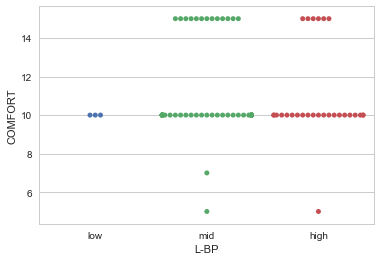

In [95]:
sns.swarmplot(x="L-BP", y="COMFORT", data=PP_Data, order=["low","mid","high"])



## SURF-STBL v COMFORT
SURF-STBL is defined as the stability of the patient's surface temperature. Surface stability was rarely found to be moderately stable, but rather one of the two extreme options (unstable or stable). This allows for easier decisions regarding patient discharge. If a patient's temperature state is unstable, it would be in the best interest of the patient to stay in care for close monitorization. 

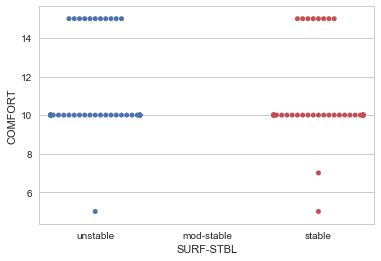

In [96]:
sns.swarmplot(x="SURF-STBL", y="COMFORT", data=PP_Data, order=["unstable","mod-stable","stable"])


## CORE-STBL v COMFORT
CORE-STBL is defined as the stability of the patient's core temperature. Core stability is more often stable than that of it's surface counterpart. This can be explained by its higher resistance to environmental changes. Comfort levels were, understandably, higher within these stable conditions. However, some patients returned high comfort responses despite unstable conditions. It's uncertain whether the the unstable temperature changes are extreme enough to impact the patient's well being and in turn their comfort response. 

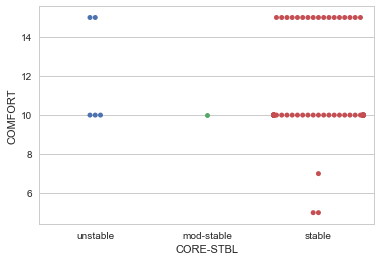

In [97]:
sns.swarmplot(x="CORE-STBL", y="COMFORT", data=PP_Data, order=["unstable","mod-stable","stable"])


## BP-STBL v COMFORT
BP-STBL is defined as blood pressure stability. The number of patients report approximately even among the unstable, mod-stable, and stable ranges. Higher comfort levels are reported more often among stable patients. This is expected as blood pressure has a high impact on patient well being and mental state. 

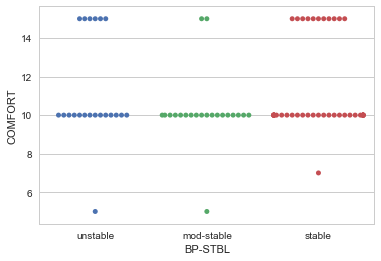

In [98]:
sns.swarmplot(x="BP-STBL", y="COMFORT", data=PP_Data, order=["unstable","mod-stable","stable"])

## decision ADM-DECS
decision ADM-DECS is defined as the discharge decision for each individual patient. The majority of the patient's were sent home following their surgery reporting mid-to-high comfort levels. However, a reputable amount (24) were sent to the general hospital floor for more monitorization. Only 2 patients were sent to the ICU, both reporting mid-range comfort levels.  Comfort levels didn't seem to play a large role in the discharge of patients, as most report mid-range comfort. Some reported poor comfort and were discharged or sent to general hospital floor despite this. 

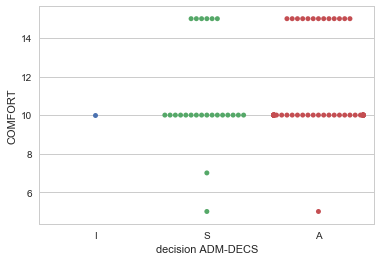

In [99]:
sns.swarmplot(x="decision ADM-DECS", y="COMFORT", data=PP_Data, order=["I","S","A"])